# EDA (Análisis Exploratorio de Datos)

Nota: es importante realizar loa procesos de ETL en la carpeta ./ETL/ y el de Feature Engineering en la carpeta ./Feature Engineering/ para realizar este paso.

## Importar Librerías

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import sys
from sklearn.feature_extraction.text import CountVectorizer

# Ignorar advertencias
warnings.filterwarnings('ignore')

### importar funciones personalizadas de ../functions/EDA.py

In [9]:
# Obtener el directorio de trabajo actual
current_dir = os.getcwd()

# Navegar hacia el directorio raíz del proyecto
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Agregar la ruta del proyecto al sys.path
sys.path.append(project_root)

In [10]:
# importar función personalizada de ./VideoGameRecommender/functions/EDA.py
# Esta función permite traer el archivo en el formato que se encuentre (CSV o Parquet)
from functions.EDA import get_file, get_frequency

## EDA - steam_games

Se realiza el Análisis Exploratorio de Datos en steam_games.

In [11]:
# se importa el archivo procesado con la función get_file(name_file) importada al inicio y se muestran las primeras 3 filas
steam_games = get_file('steam_games')
steam_games.head(3)

,id,app_name,genres,specs,price,developer,release_year
0,761140,Lost Summoner Kitty,simulation,single-player,4.99,Kotoshiro,2018.0
1,761140,Lost Summoner Kitty,action,single-player,4.99,Kotoshiro,2018.0
2,761140,Lost Summoner Kitty,strategy,single-player,4.99,Kotoshiro,2018.0


In [12]:
# se verifican valores nulos y tipos de dato
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192306 entries, 0 to 192305
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            192306 non-null  int64  
 1   app_name      192306 non-null  object 
 2   genres        191840 non-null  object 
 3   specs         186110 non-null  object 
 4   price         186953 non-null  float64
 5   developer     178277 non-null  object 
 6   release_year  178559 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 10.3+ MB


### Columna Géneros

In [13]:
# crear DF con valores únicos de juegos y géneros
games_genre = steam_games[['id', 'genres']]
games_genre.drop_duplicates(inplace=True)

# eliminar valores nulos
games_genre.dropna(inplace=True)

games_genre.tail()

,id,genres
192301,658870,indie
192302,681550,simulation
192303,681550,action
192304,681550,adventure
192305,681550,indie


### Visualizar géneros más comunes

In [15]:
# se utiliza la función get_frequency(df, elem, control) del archivo ../functions/EDA.py 
# sirve aislar el contenido y visualizar porcentaje de frecuencia
genres = get_frequency(games_genre, 'genres', 'id')
top_genres = genres.head(15)
top_genres

,genres,frequency,percentage
0,indie,17641,13.358322
1,action,13116,9.931849
2,adventure,9974,7.552628
3,casual,9767,7.395881
4,strategy,8937,6.767378
5,simulation,8035,6.084356
6,role-playing,6116,4.631228
7,co-op,5530,4.187491
8,puzzle,2277,1.724216
9,real-time,2236,1.693170


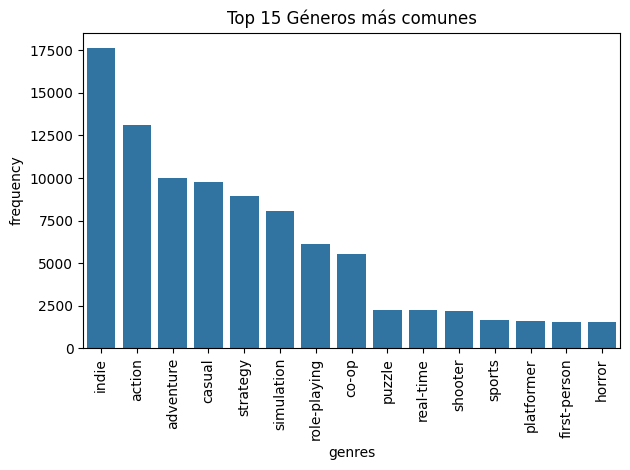

In [16]:
# visualizar los géneros más comunes
sns.barplot(x='genres', y='frequency', data=top_genres[['genres', 'frequency']])
plt.title('Top 15 Géneros más comunes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Visualizar modalidades de juego más comunes

In [17]:
# se utiliza la función get_frequency(df, elem, control) del archivo ./functios/EDA.py
game_modes = get_frequency(steam_games, 'specs', 'id')
game_modes

,specs,frequency,percentage
0,single-player,27574,65.763553
1,multi-player,8198,19.552100
2,cross-platform multiplayer,2550,6.081710
3,online multi-player,2370,5.652412
4,local multi-player,1237,2.950225
